<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             100 non-null    object 
 1   Gender                 100 non-null    object 
 2   Age                    100 non-null    int64  
 3   Previous_Marks         100 non-null    int64  
 4   Study_Hours_Per_Day    100 non-null    float64
 5   Attendance_Percentage  100 non-null    int64  
 6   Family_Income          100 non-null    int64  
 7   Tuition                100 non-null    object 
 8   Extra_Activities       100 non-null    object 
 9   Sleep_Hours            100 non-null    int64  
 10  Screen_Time_Hours      100 non-null    int64  
 11  Subject_Interest       100 non-null    object 
 12  Teacher_Rating         100 non-null    object 
 13  School_Type            100 non-null    object 
 14  Transport_Mode         100 non-null    object 
 15  Final_M

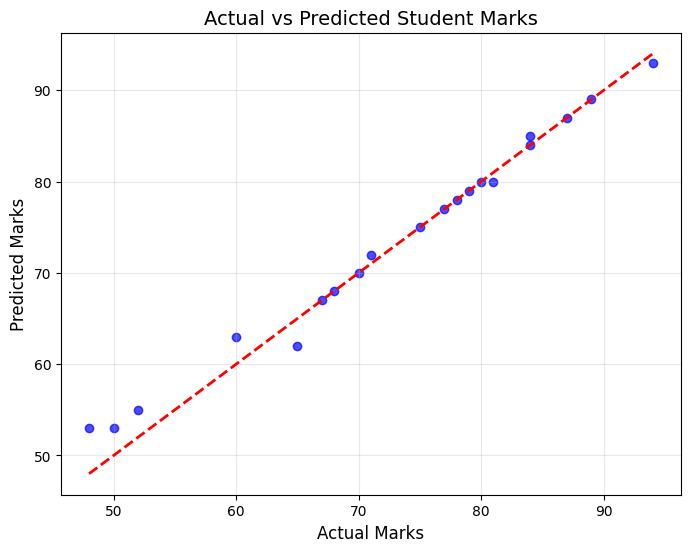

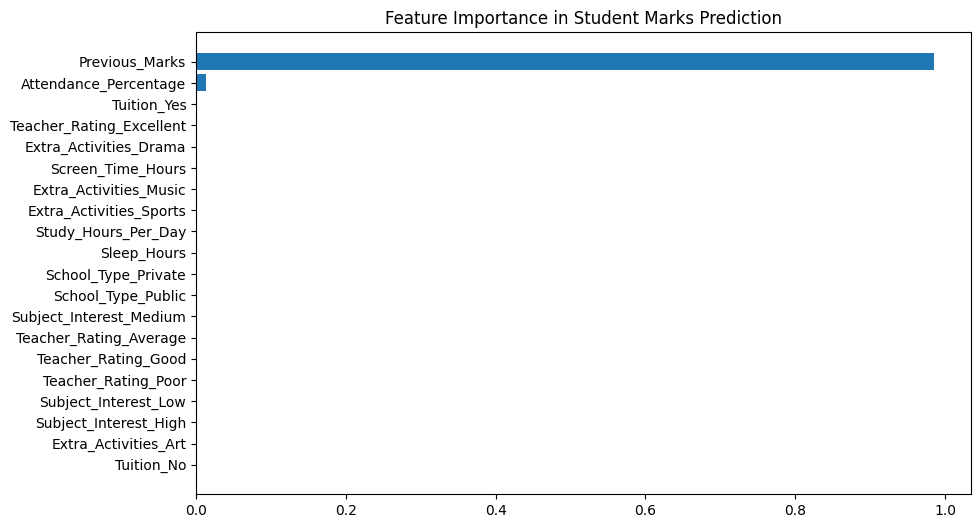

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt

# create dataframe
df=pd.read_csv('student_marks_dataset.txt')

# cleaning the dataframe
df['Study_Hours_Per_Day']=df['Study_Hours_Per_Day'].fillna(df['Study_Hours_Per_Day'].mean())
df['Tuition']=df['Tuition'].fillna(df['Tuition'].mode()[0])
df['Extra_Activities']=df['Extra_Activities'].fillna(df['Extra_Activities'].mode()[0])


# features selection
Y=df['Final_Marks']
Categs=df[['Tuition','Extra_Activities','Subject_Interest','Teacher_Rating','School_Type']]
Nume=df[['Previous_Marks','Study_Hours_Per_Day','Attendance_Percentage','Sleep_Hours','Screen_Time_Hours']]

#Encode the categs using onehotencoder
ohe=OneHotEncoder(sparse_output=False)
encode_categs=ohe.fit_transform(Categs)
encode_categs_df=pd.DataFrame(encode_categs,columns=ohe.get_feature_names_out(Categs.columns))

# scale the nume using minmax scalar
minmax=MinMaxScaler().fit_transform(Nume)
minmax_df=pd.DataFrame(minmax,columns=Nume.columns)

# final X feature
X=pd.concat([encode_categs_df,minmax_df],axis=1)


# train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#training the model
model = DecisionTreeRegressor().fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('info',df.info())
print('shape:',df.shape)
print('this is prediction\n',y_pred)
print('this is actual data\n',Y_test)

# # Metrics
print('mean_absolute_error is :',mean_absolute_error(Y_test,y_pred))
print('mean_squared_error is :',mean_squared_error(Y_test,y_pred))
print('root_mean_squared_error is :',root_mean_squared_error(Y_test,y_pred))
print('r2_score is :',r2_score(Y_test,y_pred))


# Visualization
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, alpha=0.7, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Marks', fontsize=12)
plt.ylabel('Predicted Marks', fontsize=12)
plt.title('Actual vs Predicted Student Marks', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# feature importance
plt.figure(figsize=(10,6))
feature_importance = pd.DataFrame({
    'features': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['features'], feature_importance['importance'])
plt.title('Feature Importance in Student Marks Prediction')
plt.show()